<a href="https://colab.research.google.com/github/narayan-bhattarai/AI-Classification/blob/main/cnn_mnist_improved_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN on MNIST — Interactive Notebook

This notebook demonstrates a simple Convolutional Neural Network (CNN) on the MNIST dataset. It includes **visualizations of feature activations before and after training**, and interactive exploration of CNN layers.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatLogSlider, IntSlider, Dropdown

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


## 1. Load the MNIST Dataset

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 58.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 2.01MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.85MB/s]


## 2. Define a Simple CNN Model

In [3]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## 3. Function to Visualize Feature Maps

In [4]:
def visualize_activations(model, data_loader, layer_name='conv1'):
    model.eval()
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    images = images[:5].to(device)

    with torch.no_grad():
        if layer_name == 'conv1':
            activations = F.relu(model.conv1(images))
        else:
            x = F.relu(model.conv1(images))
            x = model.pool(x)
            activations = F.relu(model.conv2(x))

    act = activations.cpu().numpy()
    fig, axes = plt.subplots(5, 8, figsize=(12, 6))
    for i in range(5):
        for j in range(8):
            axes[i, j].imshow(act[i, j, :, :], cmap='gray')
            axes[i, j].axis('off')
    plt.suptitle(f'Feature Maps ({layer_name})')
    plt.show()

## 4. Define Training Function

In [5]:
def train(model, train_loader, epochs=3):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

## 5. Testing

In [6]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    print(f'Test Accuracy: {acc:.2f}%')

## 6. Initialization

In [7]:
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 7. Visualize Activations Before and After Training

In [8]:
test(model, test_loader)

Test Accuracy: 8.92%


Visualizing Activations Before Training...


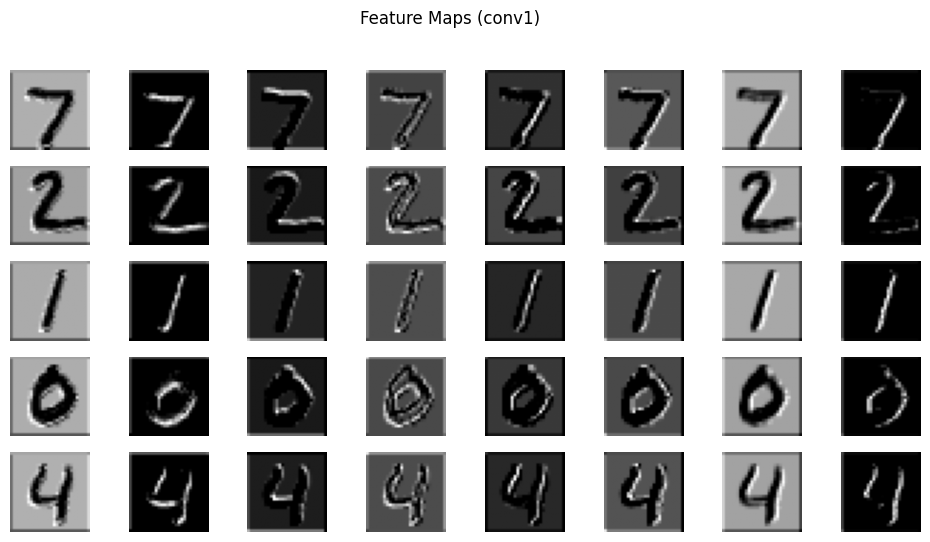

In [9]:
print("Visualizing Activations Before Training...")
visualize_activations(model, test_loader, layer_name='conv1')

In [10]:
train(model, train_loader, epochs=10)

Epoch [1/10], Loss: 0.2466, Accuracy: 92.72%
Epoch [2/10], Loss: 0.0716, Accuracy: 97.78%
Epoch [3/10], Loss: 0.0491, Accuracy: 98.45%
Epoch [4/10], Loss: 0.0392, Accuracy: 98.75%
Epoch [5/10], Loss: 0.0316, Accuracy: 98.97%
Epoch [6/10], Loss: 0.0257, Accuracy: 99.18%
Epoch [7/10], Loss: 0.0221, Accuracy: 99.28%
Epoch [8/10], Loss: 0.0187, Accuracy: 99.38%
Epoch [9/10], Loss: 0.0147, Accuracy: 99.52%
Epoch [10/10], Loss: 0.0133, Accuracy: 99.55%


Visualizing Activations After Training...


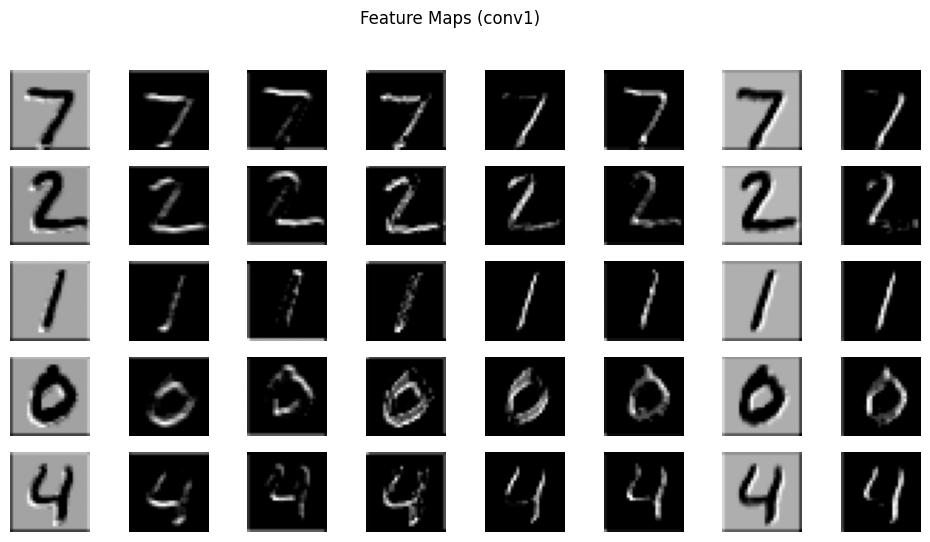

In [11]:
print("Visualizing Activations After Training...")
visualize_activations(model, test_loader, layer_name='conv1')

## 8. Testing

In [13]:
test(model, test_loader)

Test Accuracy: 98.97%


It is already 99%.